# [WB2] PD1 Kacper Kurowski

Wczytajmy przydatne paczki

In [127]:
import pandas as pd
import seaborn as sns

Wczytajmy zbiór danych

In [128]:
data = pd.read_csv("dataset_diabetes/diabetic_data.csv")

Sprawdźmy jakie kolumny są obecne w zbiorze

In [129]:
data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [130]:
data.shape

(101766, 50)

A następnie określmy jakiego typu są zmienne. Zaznaczmy, że typ ''int64'' oznacza zmienną całkowitoliczbową, a ''object'', w naszym przypadku, zmienną tekstową. To są jednak typy zadeklarowane, zgodne z tym, w jaki sposób pandas odczytuje zmienne. Oznacza to, że niektóre ze zmiennych tekstowych mogą w istocie być binarne, a zostały jedynie zakodowane przez tekst.

In [131]:
data.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

Sprawdźmy zatem jak wyglądają przykładowe wiersze naszego zbioru danych.

In [132]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


oraz ile różnych wartości mogą przyjmować kolumny w naszym zbiorze.

In [133]:
data.nunique()

encounter_id                101766
patient_nbr                  71518
race                             6
gender                           3
age                             10
weight                          10
admission_type_id                8
discharge_disposition_id        26
admission_source_id             17
time_in_hospital                14
payer_code                      18
medical_specialty               73
num_lab_procedures             118
num_procedures                   7
num_medications                 75
number_outpatient               39
number_emergency                33
number_inpatient                21
diag_1                         717
diag_2                         749
diag_3                         790
number_diagnoses                16
max_glu_serum                    4
A1Cresult                        4
metformin                        4
repaglinide                      4
nateglinide                      4
chlorpropamide                   4
glimepiride         

Na podstawie wyniku ''.nunique()'' możemy określić, które zmienne możemy wykorzystać do objaśniania. (Z opisu zbioru danych wiemy, że celem zadania jest określenie, czy osoba zostanie ponownie przyjęta do szpitala, a więc objaśniana jest zmienna ''readmitted'') Do objaśniania możemy użyć wszystkich zmiennych oprócz: objaśnianej ''readmitted'',
''encounter_id'' (pełniącej rolę id obserwacji) oraz 
''patient_nbr'' (działającej jako id pacjenta --- jakikolwiek model oparty o 2 ostatnie nie byłby generalizowalny)

Możemy również stwierdzić, że zmienne 'weight' i 'age' zostały zakodowane poprzez przedziały zmiennymi tekstowymi. To uniemożliwia potraktowanie ich co najmniej jako zmiennych porządkowych --- będzie trzeba to zmienić.

Określmy następnie jakie wartości występują dla kolumn odpowiadającym przyjmowanie jakiegoś leku --- kolumny:  
'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone'

In [134]:
data.glimepiride.unique()

array(['No', 'Steady', 'Down', 'Up'], dtype=object)

In [135]:
data.tolbutamide.unique()

array(['No', 'Steady'], dtype=object)

In [136]:
data.tolazamide.unique()

array(['No', 'Steady', 'Up'], dtype=object)

In [137]:
data["glipizide-metformin"].unique()

array(['No', 'Steady'], dtype=object)

Na podstawie powyższych przykładów możemy spodziewać się, że wartości przyjmowane przez te kolumny są w zbiorze ['No', 'Steady', 'Down', 'Up'], przy czym niektóre z nich mogą nie być przyjmowane.

Możemy również zauważyć, że niektóre zmienne zostały uprzednio zdyskretyzowane, więc zamiast znać ich wartość numeryczną, znamy jedynie pewien zakres, z którego zmienna pochodzi.

In [80]:
data.max_glu_serum.unique()

array(['None', '>300', 'Norm', '>200'], dtype=object)

In [81]:
data.weight.unique()

array(['?', '[75-100)', '[50-75)', '[0-25)', '[100-125)', '[25-50)',
       '[125-150)', '[175-200)', '[150-175)', '>200'], dtype=object)

### Wartości brakujące

W naszym zbiorze danych wartości brakujące są kodowane przez '?'. Zamieńmy je na typ wartości brakujących, który pandas może obsługiwać.

In [138]:
data2 = data.replace('?', pd.NA)

pozwoli to na określenie jak wiele wartości jest brakujacych w każdej kolumnie

In [139]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

Wartości ''race'', ''medical_specialty'' oraz ''payer_code'' są kategoryczne. Pewnym pomysłem byłoby wybranie najczęściej występującej wartości lub przeprowadzenie ciekawszej formy imputacji wartosciami znanymi. Tym razem jednak stworzymy dodatkową kategorię dla tych zmiennych, która zawierała będzie wszystkie wartości brakujące.

In [157]:
data2['race'] = data2['race'].fillna('Unknown')
data2['payer_code'] = data2['payer_code'].fillna('Unknown')
data2['medical_specialty'] = data2['medical_specialty'].fillna('Unknown')

data2['diag_1'] = data2['diag_1'].fillna('Unknown')
data2['diag_2'] = data2['diag_2'].fillna('Unknown')
data2['diag_3'] = data2['diag_3'].fillna('Unknown')

Z kolei uzyskane wyżej wartości zmiennej ''weight'' sugerują, że nie ma sensu przejmować się nią przejmować --- brakuje ogromnej części jej wartości i dlatego usuniemy ją ze zbiory danych.

In [158]:
data2.drop('weight', axis=1, inplace=True)

KeyError: "['weight'] not found in axis"

Po dokonanych operacjach nie ma już braków danych w naszym zbiorze danych.

In [160]:
data2.isnull().values.any()

False

In [142]:
data2.nunique()

encounter_id                101766
patient_nbr                  71518
race                             6
gender                           3
age                             10
admission_type_id                8
discharge_disposition_id        26
admission_source_id             17
time_in_hospital                14
payer_code                      18
medical_specialty               73
num_lab_procedures             118
num_procedures                   7
num_medications                 75
number_outpatient               39
number_emergency                33
number_inpatient                21
diag_1                         716
diag_2                         748
diag_3                         789
number_diagnoses                16
max_glu_serum                    4
A1Cresult                        4
metformin                        4
repaglinide                      4
nateglinide                      4
chlorpropamide                   4
glimepiride                      4
acetohexamide       

### Analiza eksploracyjna danych

Część eksploracji była dokonywana już wcześniej. 

Sprawdźmy następnie korelacje między zmiennymi.

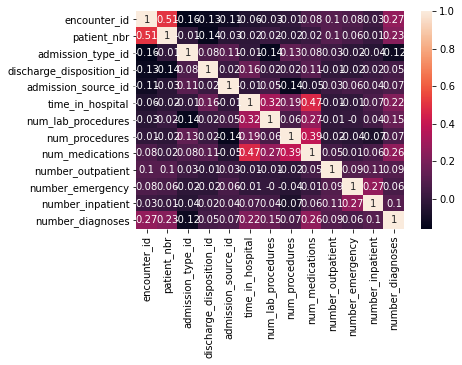

In [87]:
matrix = data2.corr().round(2)
sns.heatmap(matrix, annot=True)

Jak widać, korelacje są niezbyt znaczne.

Następnie zobaczmy na porównanie pairplotów.

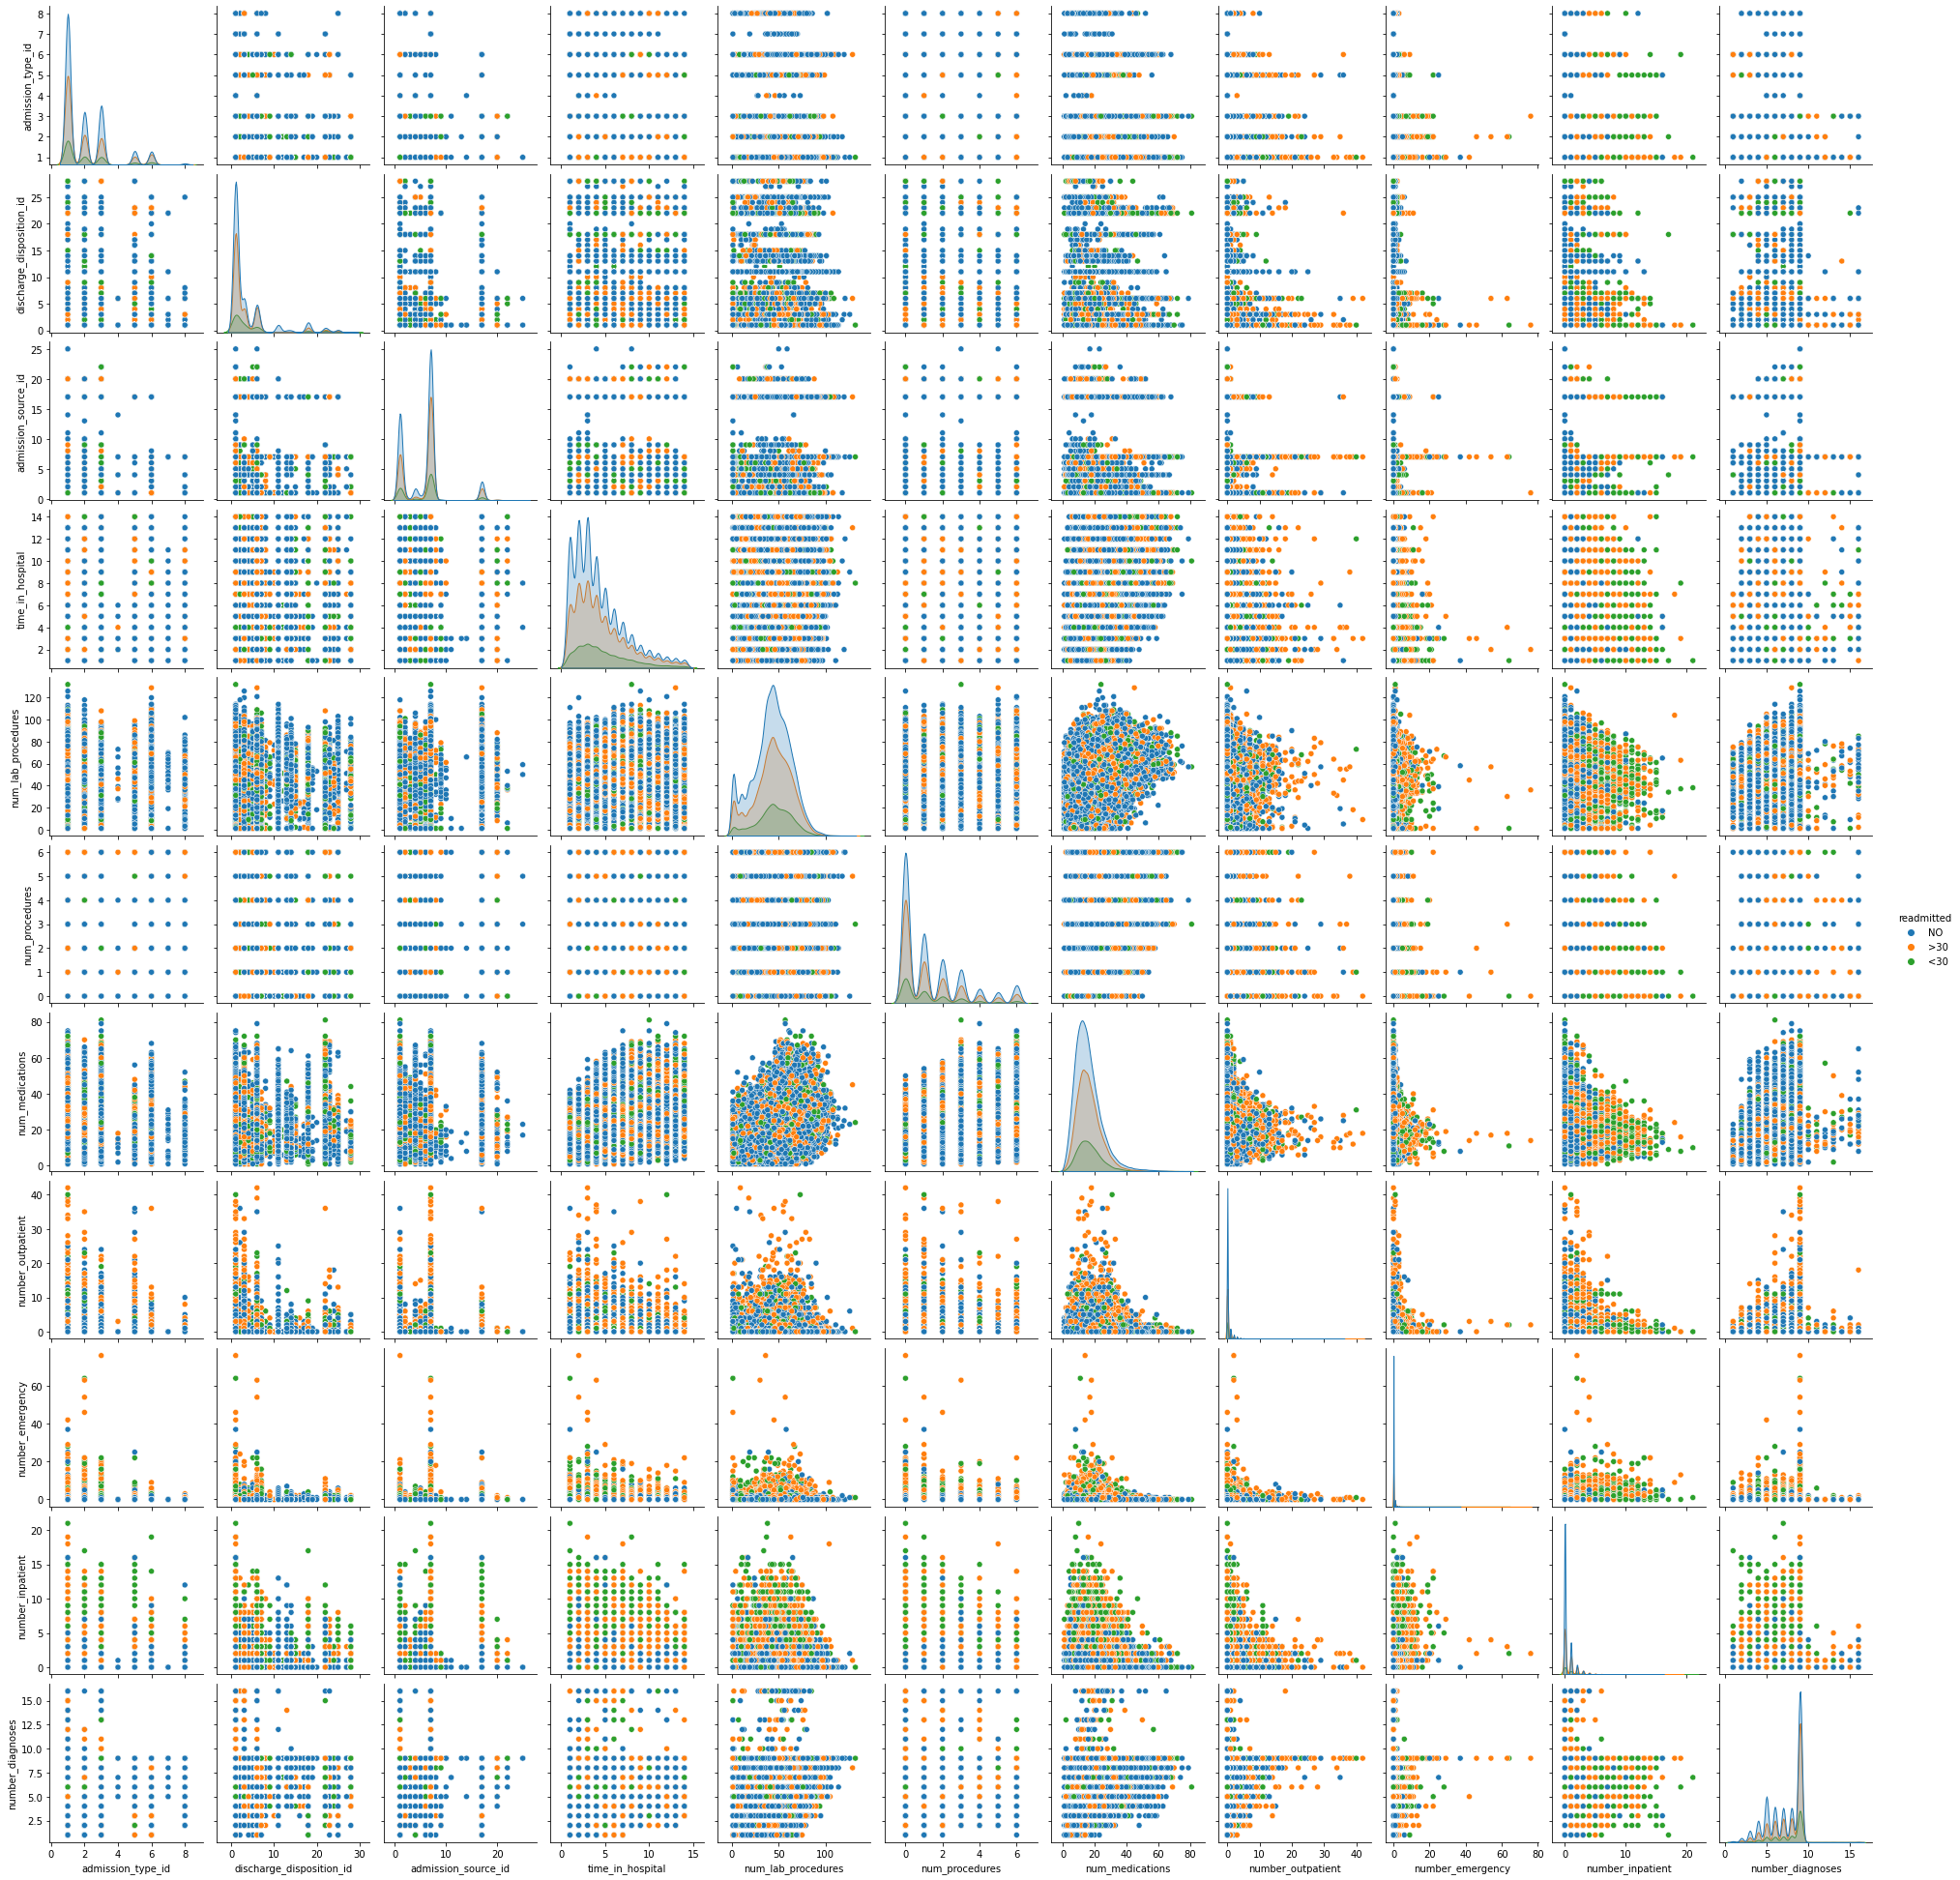

In [57]:
sns.pairplot(data2, hue="readmitted")

Na podstawie pairplotu możemy po pwierwsze wywnioskować, że rozkłady zmiennych przy założeniu, że wartość ''readmitted'' jest ustalona, są dość podobne, niezależnie od ustalonej wartości. Różnice na powyższym wykresie wynikają raczej z nierównych proporcji poszczególnych klas.

In [88]:
data2["readmitted"].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

Na podstawie wyniku value_counts wiemy, że niebieski kolor odpowiada wartości NO, pomarańczowy >30, a zielony <30.

### Transformacje zmiennych

Usuniemy wpierw zmienne, które mają stanowczo za dużo różnych wartości. (Nie zachodzi wyciek danych, bo dane z tych kolummn i tak nie przydałyby się do modelu.) Zanim jednak to zrobimy, wykorzystamy informację ile razy patient_nbr powtarza się w zbiorze danych.

In [143]:
data2['Count_nbr'] = data2.groupby('patient_nbr')['patient_nbr'].transform('count')

In [150]:
data2.drop('encounter_id', axis=1, inplace=True)
data2.drop('patient_nbr', axis=1, inplace=True)

In [149]:
data2['Count_nbr'].unique()

array([ 1,  2,  5,  3,  4,  7, 10, 16,  6, 23, 15,  9,  8, 12, 13, 22, 18,
       11, 20, 40, 21, 19, 14, 28, 17])

W ten sposób odzyskamy informację, którą jeszcze da się wykorzystać ze wspomnianych dwóch zmiennych.

Następnie zamieńmy wartości zmiennej age na śordki przedziałów. Dokonujemy tego, bo wtedy age zamiast być traktowana jako zmienna kategoryczna, będzie potraktowana jako zmienna numeryczna (a przynajmniej w ten sposób wprowadzimy do niej istniejący porządek).

In [101]:
dictionary = {
    '[0-10)' : 5,
    '[10-20)' : 15,
    '[20-30)' : 25,
    '[30-40)' : 35,
    '[40-50)' : 45,
    '[50-60)' : 55,
    '[60-70)' : 65,
    '[70-80)' : 75,
    '[80-90)' : 85,
    '[90-100)' : 95
}

In [153]:
data2['age'] = data2['age'].map(dictionary)